<a href="https://colab.research.google.com/github/premkumar205/python_practice/blob/main/290126.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## y-->continuous ---> regressions
## y--->discrete----> classification
## y --->categorical ---> discrete--->classification

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read csv file
df=pd.read_csv("diabetes.csv")

In [7]:
#taking sample
df.head()
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [9]:
df.sample(5)  # select data from dataset randomly

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1369,0,147,85,54,0,42.8,0.375,24,0
1668,3,173,84,33,474,35.7,0.258,22,1
1358,0,113,80,16,0,31.0,0.874,21,0
718,1,108,60,46,178,35.5,0.415,24,0
1572,2,83,65,28,66,36.8,0.629,24,0


In [10]:
#info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [11]:
#statistical analysis of dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [12]:
#check for null values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [25]:
import warnings
warnings.filterwarnings('ignore')

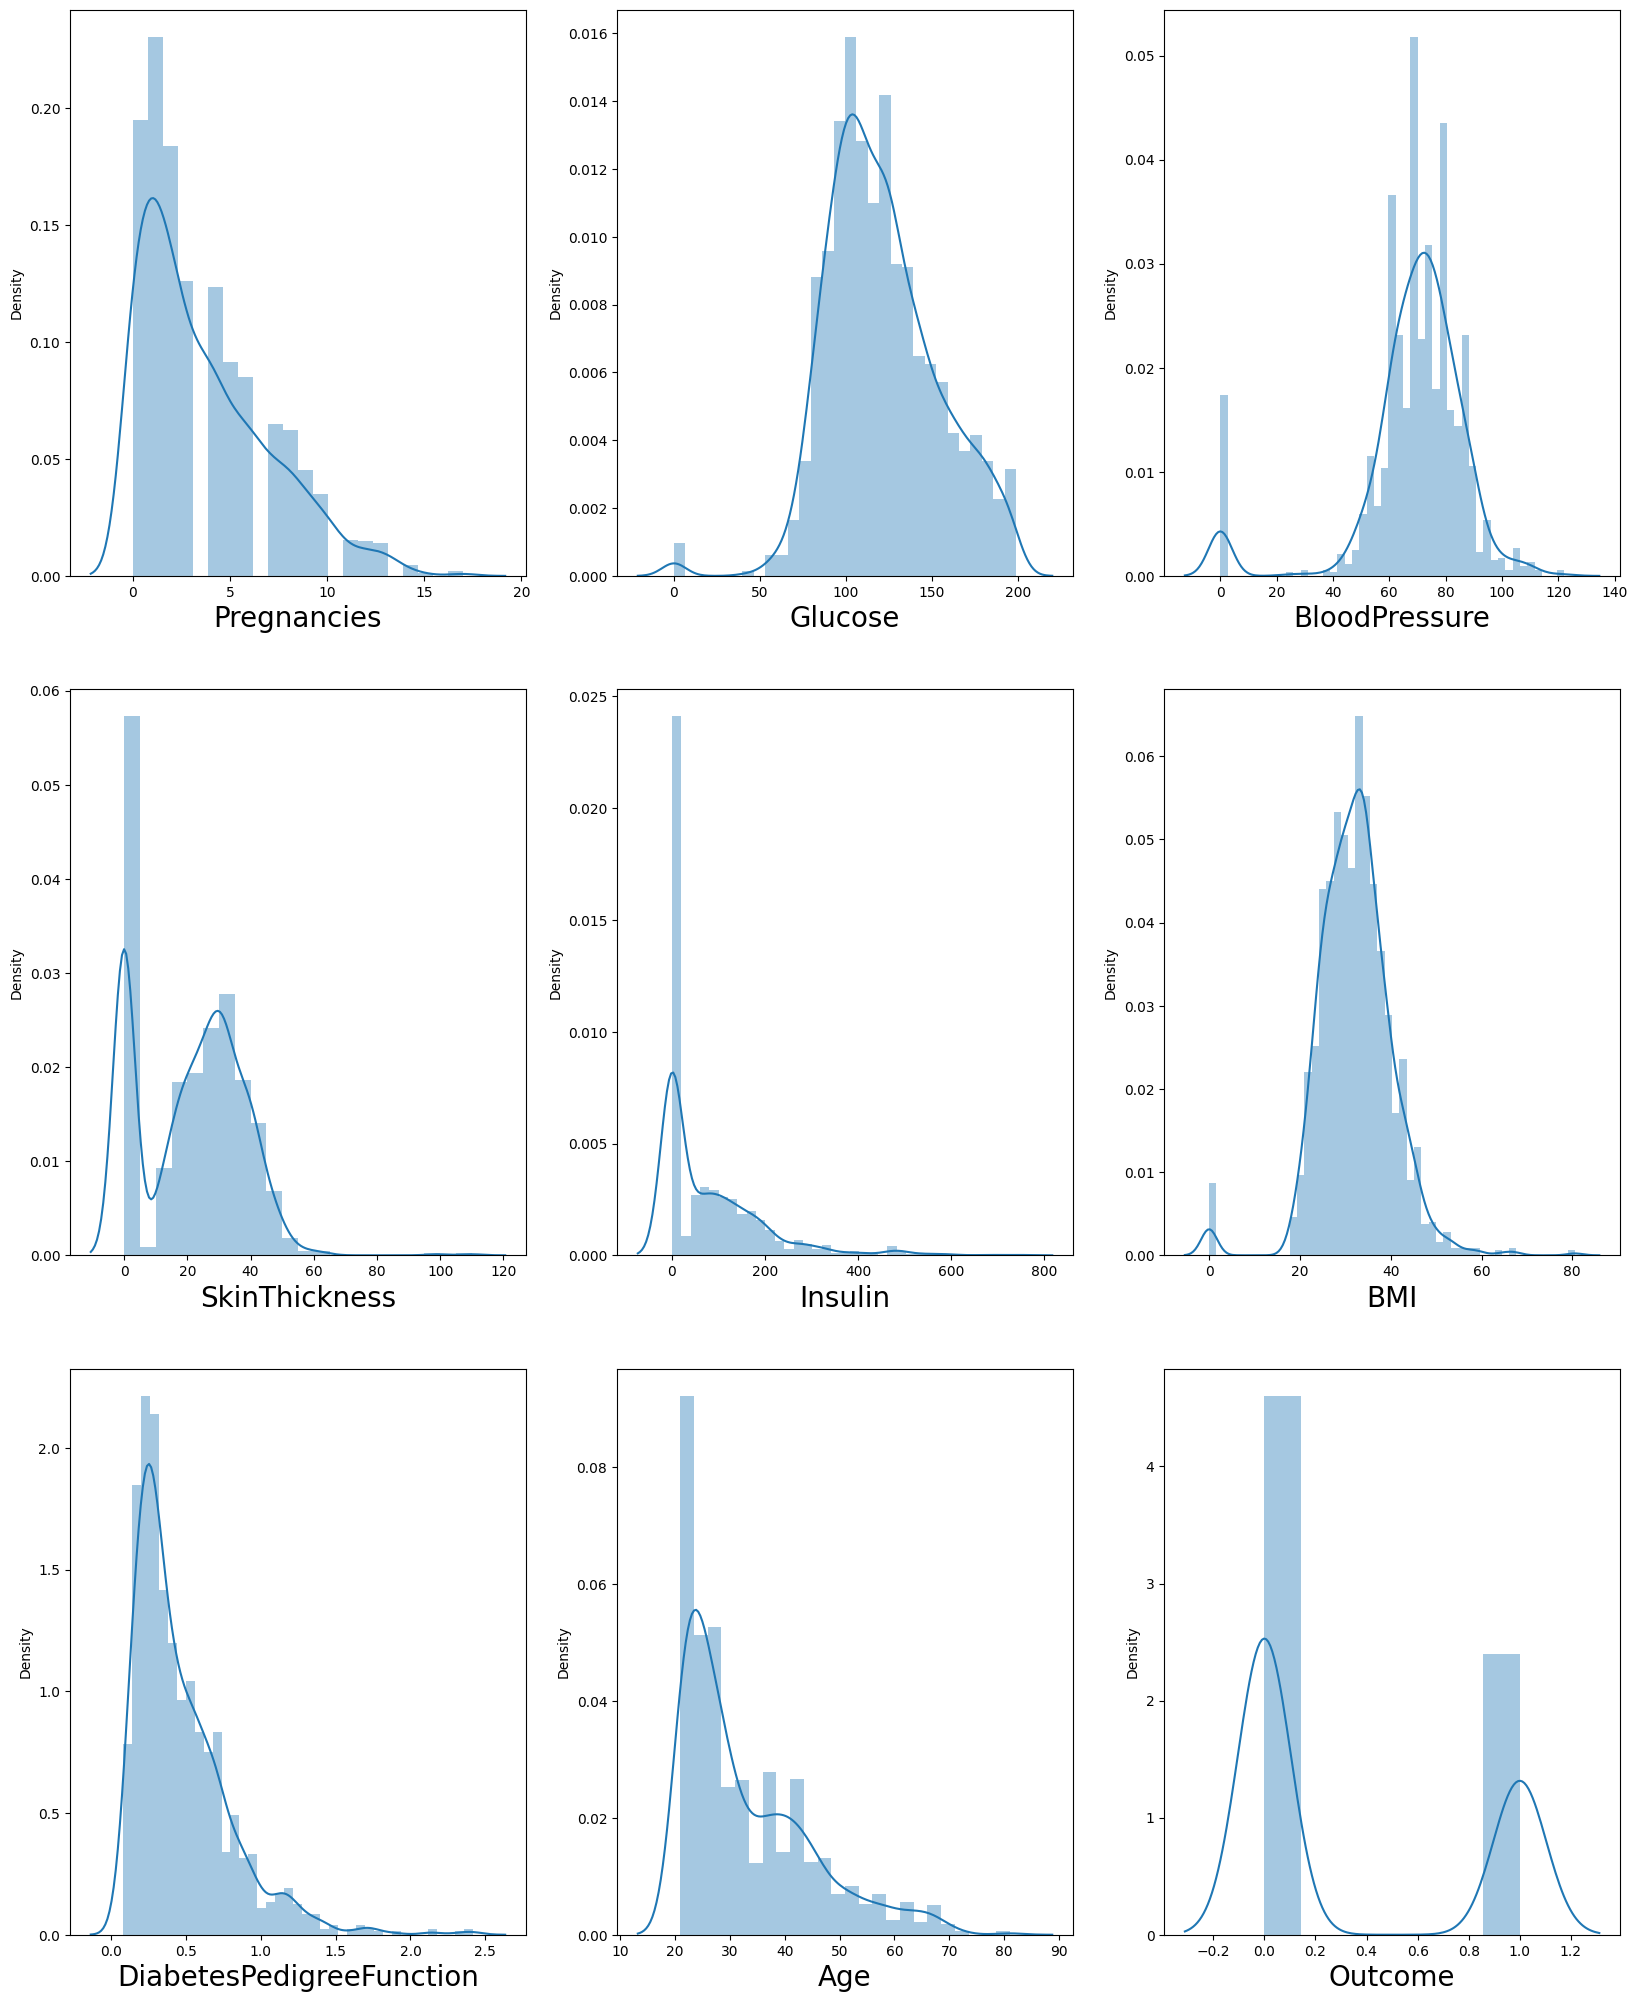

In [26]:
# distribution plot or EDA analysis
## let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel()
    plotnumber+=1
plt.show()




insight:
  

In [28]:
# replacing the column where the value is 0 with median and mode
df['BMI']=df['BMI'].replace(0,df['BMI'].median())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())

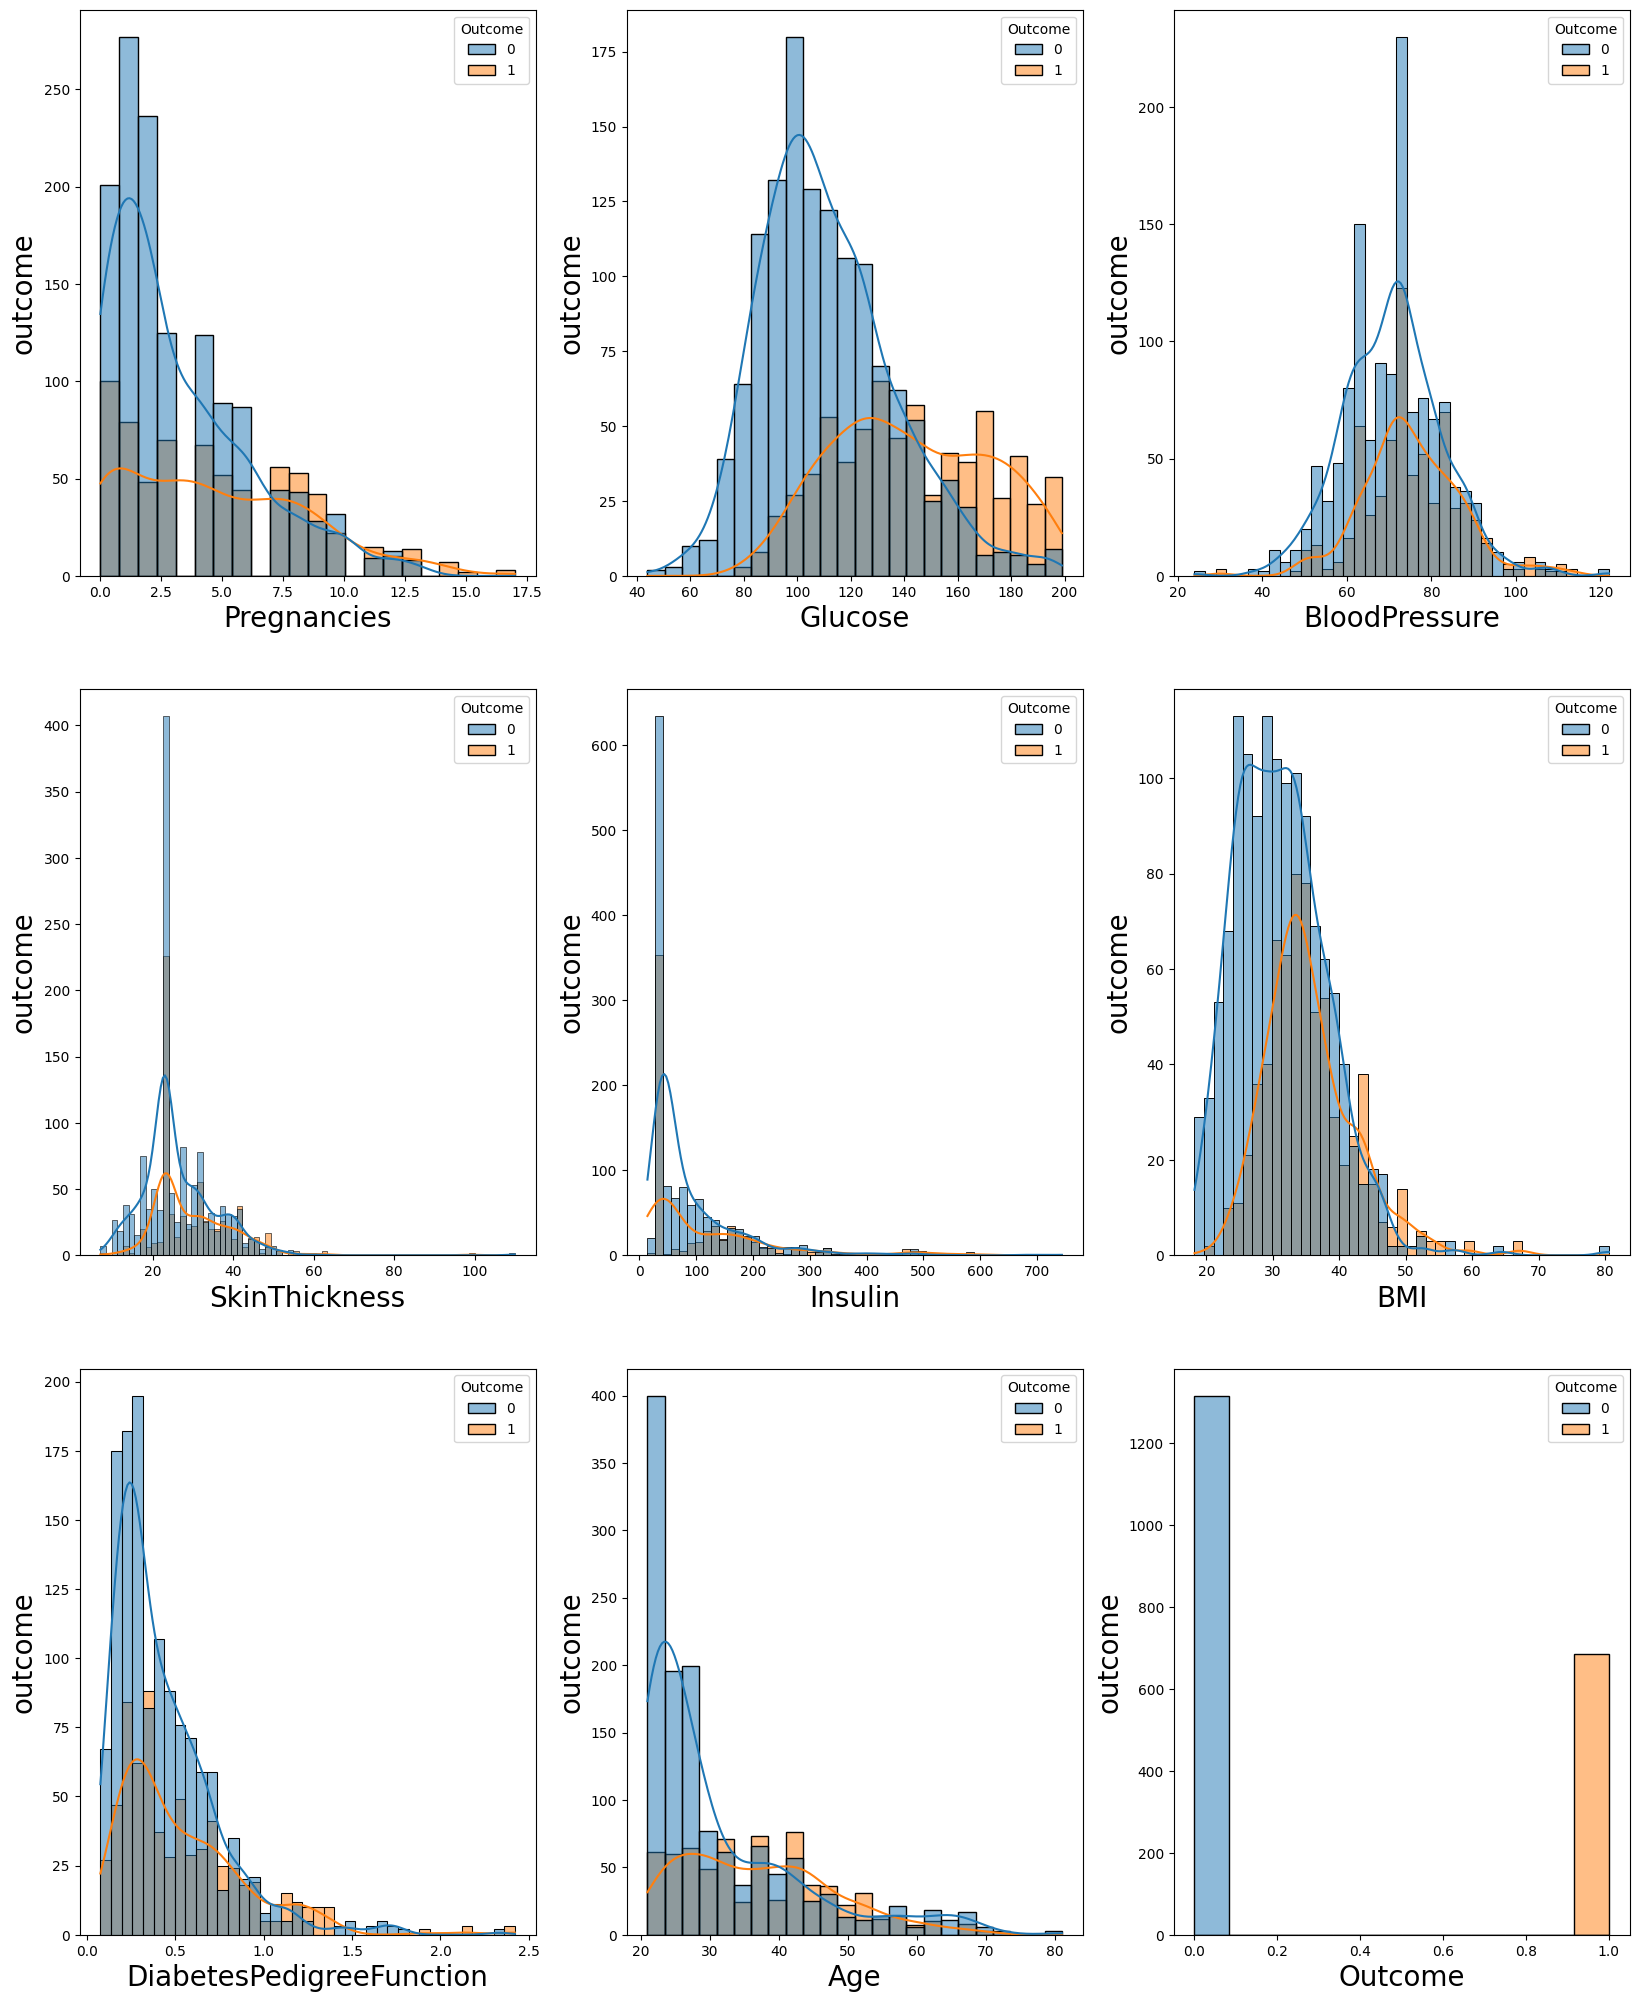

In [33]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
      ax=plt.subplot(3,3,plotnumber)
      sns.histplot(data=df, x=column, hue='Outcome', kde=True)
      plt.xlabel(column,fontsize=20)
      plt.ylabel('outcome',fontsize=20)
    plotnumber+=1
plt.show()

# insight
- **Pregnancies:**Both groups cluster at lower pregnancy counts, but diabetes cases rise slightly with higher counts, hinting at a possible link.

- **Glucose:** Diabetic cases clearly show higher glucose levels, making this the strongest differentiator.
-** Blood Pressure:** Some overlap exists, but diabetics tend to have slightly broader or higher readings.
-** Skin Thickness:** Both groups look very similar, so it’s not a strong predictor.
- **Insulin:** Distributions overlap heavily; high values appear in some diabetics but overall not distinct.
- **BMI:** Diabetic cases lean towards higher BMI, showing a strong link with diabetes.
- **Diabetes Pedigree Function:** Overlaps a lot, offering weak predictive power on its own.
-** Age:** Diabetic cases skew older, suggesting age is an important factor.


In [38]:
from scipy import stats
import statsmodels.api as sm
Glucose_pos= df[df['Outcome']==1]['Glucose']
Glucose_neg= df[df['Outcome']==0]['Glucose']

# T-test
**definition:** T-test is used to compare means when the population variance is unknown or the sample size is small

---
## independent T-test
**example:** compare **glucose ** of **positive vs negative ** person.

**Hypotheses:**
- H0: glucose distribution of positive = glucose distribution of negative
- H1: glucose distribution of positive ≠ glucose distribution of negative



In [49]:
t_stat,p_val= stats.ttest_ind(Glucose_pos,Glucose_neg)
print("independent t test statistics:",t_stat)
print("p value:",p_val)
if p_val<0.05:
  print("reject null hypothesis")
else:
  print("accept null hypothesis")

independent t test statistics: 24.971475428522687
p value: 5.175643940194324e-120
reject null hypothesis


In [45]:
Pregnancies_pos= df[df['Outcome']==1]['Pregnancies']
Pregnancies_neg= df[df['Outcome']==0]['Pregnancies']
t_stat,p_val= stats.ttest_ind(Pregnancies_pos,Pregnancies_neg)
print("independent T test statistics:",t_stat)
print("p value:",p_val)
if p_val < 0.05:
  print("reject null hypothesis")
else:
  print("accept null hypothesis")

independent T test statistics: 10.294740851256517
p value: 2.968017579508808e-24
reject null hypothesis


In [50]:
BloodPressure_pos= df[df['Outcome']==1]['BloodPressure']
BloodPressure_neg= df[df['Outcome']==0]['BloodPressure']
t_stat,p_val= stats.ttest_ind(BloodPressure_pos,BloodPressure_neg)
print("independent T test statistics:",t_stat)
print("p value:",p_val)
if p_val < 0.05:
  print("reject null hypothesis")
else:
  print("accept null hypothesis")

independent T test statistics: 7.906717522386685
p value: 4.332434442926917e-15
reject null hypothesis


In [51]:
SkinThickness_pos= df[df['Outcome']==1]['SkinThickness']
SkinThickness_neg= df[df['Outcome']==0]['SkinThickness']
t_stat,p_val= stats.ttest_ind(SkinThickness_pos,SkinThickness_neg)
print("independent T test statistics:",t_stat)
print("p value:",p_val)
if p_val < 0.05:
  print("reject null hypothesis")
else:
  print("accept null hypothesis")

independent T test statistics: 8.243567257023205
p value: 2.9903729132502143e-16
reject null hypothesis


In [53]:
Insulin_pos= df[df['Outcome']==1]['Insulin']
Insulin_neg= df[df['Outcome']==0]['Insulin']
t_stat,p_val= stats.ttest_ind(Insulin_pos,Insulin_neg)
print("independent T test statistics:",t_stat)
print("p value:",p_val)
if p_val < 0.05:
  print("reject null hypothesis")
else:
  print("accept null hypothesis")

independent T test statistics: 6.558200400844056
p value: 6.914620562627028e-11
reject null hypothesis


In [59]:
BMI_pos= df[df['Outcome']==1]['BMI']
BMI_neg= df[df['Outcome']==0]['BMI']
t_stat,p_val= stats.ttest_ind(BMI_pos,BMI_neg)
print("independent T test statistics:",t_stat)
print("p value:",p_val)
if p_val < 0.05:
  print("reject null hypothesis")
else:
  print("accept null hypothesis")

independent T test statistics: 13.164407810509676
p value: 5.123041339893959e-38
reject null hypothesis


In [57]:
DiabetesPedigreeFunction_pos= df[df['Outcome']==1]['DiabetesPedigreeFunction']
DiabetesPedigreeFunction_neg= df[df['Outcome']==0]['DiabetesPedigreeFunction']
t_stat,p_val= stats.ttest_ind(DiabetesPedigreeFunction_pos,DiabetesPedigreeFunction_neg)
print("independent T test statistics:",t_stat)
print("p value:",p_val)
if p_val < 0.05:
  print("reject null hypothesis")
else:
  print("accept null hypothesis")

independent T test statistics: 7.034386057932806
p value: 2.7384134507979468e-12
reject null hypothesis


In [58]:
Age_pos= df[df['Outcome']==1]['Age']
Age_neg= df[df['Outcome']==0]['Age']
t_stat,p_val= stats.ttest_ind(Age_pos,Age_neg)
print("independent T test statistics:",t_stat)
print("p value:",p_val)
if p_val < 0.05:
  print("reject null hypothesis")
else:
  print("accept null hypothesis")

independent T test statistics: 10.880410795440374
p value: 7.948733933404598e-27
reject null hypothesis


## **scaling the data**

 - **standardization:-**  *Z=Xi-Xmean/std  *
- **Normalization :-** * Z= Xi-Xm1/Xmax-Xmin*

In [65]:
## scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)
X_scaled_df = pd.DataFrame(X_scaled, columns=x.columns)
X_scaled_df.describe()

,Age,DiabetesPedigreeFunction,BMI,Insulin,SkinThickness,BloodPressure,Glucose,Pregnancies
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,1.136868e-16,1.225686e-16,-3.836931e-16,3.375078e-17,3.375078e-17,5.613288e-16,7.815970e-17,-1.065814e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.026055e+00,-1.214728e+00,-2.009500e+00,-8.675018e-01,-2.146611e+00,-4.050068e+00,-2.553156e+00,-1.120495e+00
25%,-7.714617e-01,-7.015452e-01,-7.018475e-01,-6.033107e-01,-4.732073e-01,-7.019013e-01,-7.515372e-01,-8.179445e-01
50%,-3.471387e-01,-2.934724e-01,-4.802144e-02,-6.033107e-01,-4.732073e-01,-3.226796e-02,-1.619164e-01,-2.128441e-01
75%,5.863720e-01,4.732099e-01,5.779823e-01,3.111967e-01,4.680825e-01,6.373654e-01,6.242446e-01,6.948066e-01
max,4.065821e+00,6.025474e+00,6.671085e+00,6.550170e+00,8.625927e+00,4.152941e+00,2.524134e+00,4.022859e+00


In [66]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_scaled_norm = norm.fit_transform(x)
X_scaled_norm= pd.DataFrame(X_scaled_norm, columns=x.columns)
X_scaled_norm.describe()

,Age,DiabetesPedigreeFunction,BMI,Insulin,SkinThickness,BloodPressure,Glucose,Pregnancies
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.201508,0.167775,0.231494,0.116951,0.199267,0.493730,0.502858,0.217853
std,0.196440,0.138152,0.115228,0.134847,0.092852,0.121937,0.197005,0.194474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050000,0.070880,0.150641,0.035616,0.155340,0.408163,0.354839,0.058824
50%,0.133333,0.127242,0.225962,0.035616,0.155340,0.489796,0.470968,0.176471
75%,0.316667,0.233134,0.298077,0.158904,0.242718,0.571429,0.625806,0.352941
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
# splitting the training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=42)


In [71]:
from os import error
# taking optimal k to determine how many neatest nobhour to create
from sklearn.neighbors import KNeighborsClassifier
# create a list to store the error values for each k
error_rate = []
# will take some time
for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  Pred_i = knn.predict(X_test)
  error_rate.append({i: np.mean(Pred_i != y_test)})

In [73]:
error_rate

[np.float64(0.036),
 np.float64(0.116),
 np.float64(0.16),
 np.float64(0.194),
 np.float64(0.194),
 np.float64(0.212),
 np.float64(0.2),
 np.float64(0.22),
 np.float64(0.196),
 np.float64(0.196)]

In [36]:
# simple linear regression for Outcome
# step1 independent and dependent variable creation
x=df[['Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure','Glucose','Pregnancies']]  #x variable contains one future
y=df.Outcome   #Y IS TARGERT

In [14]:
# step-2 spliting the dataset into train and test model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [15]:
print(len(x_test))
print(len(y_train))

400
1600


In [16]:
# Step 3 Creating model
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(x_train,y_train) # training of linear regression
y_predict=LR.predict(x_test)


In [20]:
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error,
root_mean_squared_error)
r2score=r2_score(y_test,y_predict)
r3score=r2_score(y_train,LR.predict(x_train))
print("R2score:",r2score)
print("R3score:",r3score)

R2score: 0.29738369267790155
R3score: 0.28371044722066807


In [18]:
print("MSE:",mean_squared_error(y_test,y_predict))
print("MAE:",mean_absolute_error(y_test,y_predict))
print("RMSE:",root_mean_squared_error(y_test,y_predict))

MSE: 0.1565253478636805
MAE: 0.33187252363936054
RMSE: 0.3956328447736367


In [21]:
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error,
root_mean_squared_error)
r2score=r2_score(y_test,y_predict)
r2score

0.29738369267790155